<a href="https://colab.research.google.com/github/yawpAI/colab/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
from sklearn.model_selection import train_test_split



In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
X_train_scaled = X_train / 255.0
X_val_scaled = X_val / 255.0
X_test_scaled = X_test / 255.0

In [10]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)
print(X_val_scaled.shape)
print(y_val.shape)

(48000, 28, 28)
(48000,)
(10000, 28, 28)
(10000,)
(12000, 28, 28)
(12000,)


In [11]:
X_train_scaled[:10]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5308 - accuracy: 0.8455 - val_loss: 0.1677 - val_accuracy: 0.9516
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1726 - accuracy: 0.9490 - val_loss: 0.1196 - val_accuracy: 0.9633
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1204 - accuracy: 0.9646 - val_loss: 0.1050 - val_accuracy: 0.9680
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0934 - accuracy: 0.9717 - val_loss: 0.0922 - val_accuracy: 0.9734
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0762 - accuracy: 0.9772 - val_loss: 0.0844 - val_accuracy: 0.9731
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0679 - accuracy: 0.9777 - val_loss: 0.0834 - val_accuracy: 0.9748
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.0802 - val_accuracy:

In [13]:
model.evaluate(X_train_scaled, y_train)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 0.9986


[0.0057034301571547985, 0.9986041784286499]

In [14]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9798


[0.08375635743141174, 0.9797999858856201]

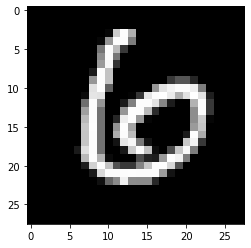

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X_test[11], cmap='gray')

In [16]:
model.predict(X_test[11].reshape(1,28,28))

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [17]:
import numpy as np
pred = np.where(model.predict(X_test[11].reshape(1,28,28))[0] == 1)
pred[0][0]

6

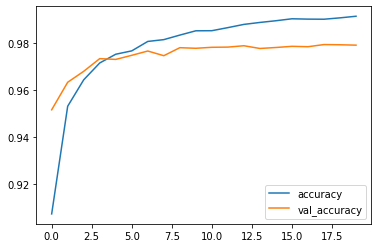

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

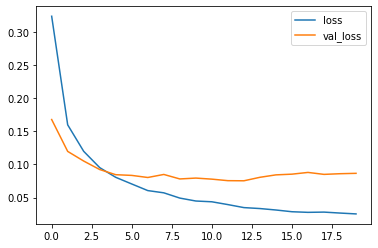

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

Confusion matrix, without normalization
[[ 972    0    3    0    0    0    0    1    3    1]
 [   0 1127    5    0    0    0    2    0    1    0]
 [   2    0 1014    5    2    0    2    5    2    0]
 [   0    0    3  993    0    1    0    5    0    8]
 [   3    1    3    0  953    0    4    3    2   13]
 [   2    0    0   13    1  865    1    1    5    4]
 [   6    3    3    1    3    4  933    2    2    1]
 [   0    4    7    0    0    0    0 1007    2    8]
 [   6    0    3    4    5    0    0    3  950    3]
 [   1    4    0    3    7    1    0    5    2  986]]


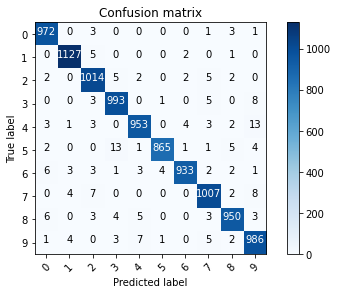

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

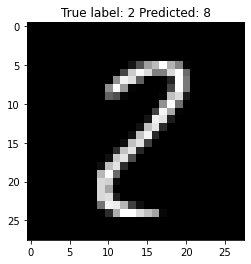

In [21]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test_scaled).argmax(axis=1)))

[[ 970    0    3    0    0    1    1    1    3    1]
 [   0 1127    4    0    0    0    2    0    2    0]
 [   2    1 1014    4    2    0    2    5    2    0]
 [   0    0    4  990    0    3    0    5    0    8]
 [   2    1    3    0  958    0    3    3    2   10]
 [   2    0    0   11    2  868    1    1    3    4]
 [   5    3    4    0    4    4  933    2    2    1]
 [   0    5    6    0    1    1    0 1007    2    6]
 [   5    0    3    2    6    0    0    4  950    4]
 [   1    4    1    3   10    3    0    4    2  981]]
